model
---

This notebook creates a linear regression model from the training data and applies it to the test data.

In [46]:
#import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score#, train_test_split

In [47]:
train_data_path = '../data/train_processed.csv'
test_data_path = '../data/test_processed.csv'

traindf = pd.read_csv(train_data_path)
testdf = pd.read_csv(test_data_path)
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5971 entries, 0 to 5970
Columns: 244 entries, SellerIsPriv to VehYear_2016
dtypes: float64(244)
memory usage: 11.1 MB


In [61]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 244 entries, SellerIsPriv to Dealer_Listing_Price
dtypes: float64(244)
memory usage: 1.9 MB


In [48]:
#just to double-check, the training and testing data columns are the same.

traincols = traindf.columns.to_list()
traincols.remove('Dealer_Listing_Price')

traincols == testdf.columns.to_list()

True

# predicting dealer listing price

In [49]:
###### train-test split the training data to check
X = traindf.drop(columns = 'Dealer_Listing_Price')
y = traindf['Dealer_Listing_Price']

# actually, no need to tts. Just use cross_val_score. The linear fit is the same.
# Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 1916)

In [50]:
#instantiate and fit a linear model to the training data using 5 cv folds

lr = LinearRegression()
cross_val_score(lr, X, y, cv = 5)

array([0.80326272, 0.80303177, 0.82342441, 0.81447254, 0.77250683])

In [51]:
# the fit is O.K. Use the linear regression on the test set and save.

In [52]:
lr.fit(X, y)
preds = lr.predict(testdf)

In [56]:
#the mean and std of the predicted values for the test set are similar to the dealer listing prices in the training set.
preds.mean(), preds.std(), y.mean(), y.std()

(32426.302066692955, 6912.640352068063, 32038.09613130129, 7524.55733995572)

In [58]:
# look at some predictions
testdf['Dealer_Listing_Price'] = preds
testdf['Dealer_Listing_Price']

0      43402.905300
1      21655.212581
2      22108.147940
3      24701.152495
4      40854.385239
           ...     
995    33344.387246
996    35429.419922
997    42498.278455
998    46828.779463
999    39383.038540
Name: Dealer_Listing_Price, Length: 1000, dtype: float64

In [59]:
testdf

,SellerIsPriv,SellerRating,SellerRevCnt,VehCertified,VehListdays,VehMileage,SellerCity_Chicago,SellerCity_Battle Creek,SellerCity_Columbus,SellerCity_Louisville,...,VehMake_Jeep,VehPriceLabel_Fair Price,VehPriceLabel_Good Deal,VehPriceLabel_Great Deal,VehYear_2015,VehYear_2017,VehYear_2018,VehYear_2019,VehYear_2016,Dealer_Listing_Price
0,0.0,2.5,59.0,0.0,143.991262,13625.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,43402.905300
1,0.0,4.7,2116.0,0.0,138.770486,42553.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,21655.212581
2,0.0,3.9,46.0,1.0,31.951088,48951.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,22108.147940
3,0.0,4.5,1075.0,0.0,5.950127,44179.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,24701.152495
4,0.0,4.6,162.0,0.0,24.672986,22269.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,40854.385239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,4.8,1081.0,0.0,18.091597,24744.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,33344.387246
996,0.0,4.0,240.0,0.0,167.799676,5699.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,35429.419922
997,0.0,5.0,134.0,0.0,46.215625,17985.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,42498.278455
998,0.0,3.8,7.0,0.0,14.907535,27.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,46828.779463


# predicting trim

In [98]:
#imports
from keras.layers import Dense
from keras.models import Sequential

In [66]:
#load the trim data
trimdata = pd.read_csv('../data/train_trim_data.csv', index_col='Unnamed: 0')
trimdata.head()

,Vehicle_Trim
0,High Altitude
1,NaN
2,Laredo
3,Limited
4,Luxury


In [67]:
#slap the trim back on
traindf = traindf.join(trimdata)

In [71]:
#remove nulls. A lot of the trims are missing.
traindf.dropna(inplace=True)

In [78]:
# #get unique trims
# trims = list(traindf['Vehicle_Trim'].unique())

In [133]:
# trims.index('Limited')

In [135]:
# #turn trim strings into a vector and vice versa.

# def encode_trim(some_trim_string, unique_trim_list):
#     encoded_trim_vector = np.full(len(unique_trim_list), 0)
#     trim_index = list(unique_trim_list).index(some_trim_string)
#     encoded_trim_vector[trim_index] = 1
#     return encoded_trim_vector

# def decode_trim(trim_vector, unique_trim_list):
#     trim_index = list(trim_vector).index(1)
#     decoded_trim_string = unique_trim_list[trim_index]
#     return decoded_trim_string


In [134]:
# #test them out
# test_decode = np.full(len(trims), 0)
# test_decode[5] = 1

# test_encode = decode_trim(test_decode, trims)
# test_encode

In [194]:
#encode_trim(test_encode, trims)

In [137]:
#turn all training trims into vectors

train_trims = pd.get_dummies(traindf['Vehicle_Trim'])

In [150]:
trims = train_trims.columns

In [208]:
traindf[traindf['Vehicle_Trim'] == 'Limited']

,SellerIsPriv,SellerRating,SellerRevCnt,VehCertified,VehListdays,VehMileage,Dealer_Listing_Price,SellerCity_Chicago,SellerCity_Battle Creek,SellerCity_Columbus,...,VehMake_Jeep,VehPriceLabel_Fair Price,VehPriceLabel_Good Deal,VehPriceLabel_Great Deal,VehYear_2015,VehYear_2017,VehYear_2018,VehYear_2019,VehYear_2016,Vehicle_Trim
3,0.0,3.7,74.0,0.0,98.665301,19788.0,33495.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Limited
5,0.0,3.5,17.0,0.0,194.482338,48814.0,22989.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Limited
7,0.0,3.7,72.0,1.0,74.204248,26395.0,30493.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Limited
9,0.0,3.6,44.0,0.0,0.944028,40398.0,26999.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Limited
11,0.0,4.7,187.0,0.0,4.945428,34437.0,29996.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Limited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,0.0,4.4,101.0,0.0,7.412639,39108.0,44570.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Limited
5957,0.0,4.4,15.0,1.0,34.890208,41886.0,36045.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Limited
5958,0.0,4.8,461.0,0.0,18.422720,39882.0,26950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Limited
5959,0.0,4.7,58.0,1.0,19.744896,17314.0,40995.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Limited


In [211]:
%%time

#duplicate data with underrepresented classes
newdf = pd.DataFrame([], columns = traindf.columns)

for vehicle_trim_class in traindf['Vehicle_Trim'].value_counts().index:
    print(vehicle_trim_class)
    keep_going = True
    while keep_going:
        newdf = pd.concat([newdf, traindf[traindf['Vehicle_Trim'] == vehicle_trim_class]])
        if len(newdf[newdf['Vehicle_Trim'] == vehicle_trim_class]) > 600:
            keep_going = False
    

Limited
Premium Luxury
Laredo
Luxury
Overland
Altitude
Summit
Trailhawk
Base
Platinum
High Altitude
SRT
Luxury FWD
FWD
Laredo E
Premium Luxury FWD
Trackhawk
Sterling Edition
Luxury AWD
Platinum AWD
Premium Luxury AWD
75th Anniversary
Limited 75th Anniversary Edition
SRT Night
Upland
Limited 4x4
75th Anniversary Edition
Limited 75th Anniversary
Limited X
Wall time: 1min 11s


In [213]:
len(newdf)

19525

In [250]:
num_inputs = len(newdf.columns)
num_outputs = len(trims)

#create a model
model = Sequential()
model.add(Dense(num_inputs, activation='relu'))
model.add(Dense(num_outputs*2, activation='relu'))
model.add(Dense(num_outputs, activation = 'softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [251]:
#train it!

X = newdf.drop(columns = ['Dealer_Listing_Price','Vehicle_Trim'])
y = pd.DataFrame(newdf['Vehicle_Trim'].apply(lambda this_trim: encode_trim(this_trim,trims)).to_list())

In [252]:
y

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [255]:
%%time
epochs = 5120
batch_size = 256
history = model.fit(
    X,
    y,
    batch_size = batch_size,
    epochs=epochs,
    validation_split = 0.2,
    verbose = False
)

Wall time: 18min 1s


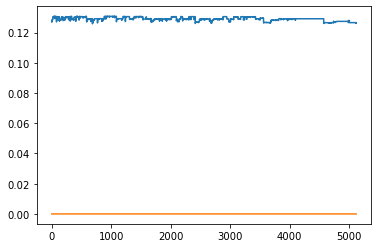

In [256]:
acc_hist, val_acc_hist = history.history['accuracy'], history.history['val_accuracy']

num_epochs_passed = len(acc_hist)
xes = np.linspace(0,num_epochs_passed,num_epochs_passed)
plt.plot(xes, acc_hist)
plt.plot(xes,val_acc_hist)

In [257]:
#this is not good at all. Just train it on the unbalanced data.

In [258]:
num_inputs = len(traindf.columns) - 2
num_outputs = len(trims)

#create a model
model = Sequential()
model.add(Dense(num_inputs, activation='relu'))
model.add(Dense(num_outputs*2, activation='relu'))
model.add(Dense(num_outputs, activation = 'softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [259]:
#train it!

X = traindf.drop(columns = ['Dealer_Listing_Price','Vehicle_Trim'])
y = pd.DataFrame(traindf['Vehicle_Trim'].apply(lambda this_trim: encode_trim(this_trim,trims)).to_list())

In [261]:
%%time
epochs = 512
batch_size = 256
history = model.fit(
    X,
    y,
    batch_size = batch_size,
    epochs=epochs,
    validation_split = 0.2,
    verbose = False
)

Wall time: 40.3 s


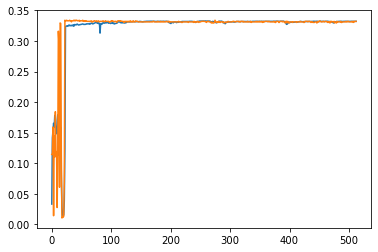

In [266]:
acc_hist, val_acc_hist = history.history['accuracy'], history.history['val_accuracy']

num_epochs_passed = len(acc_hist)
xes = np.linspace(0,num_epochs_passed,num_epochs_passed)
plt.plot(xes, acc_hist)
plt.plot(xes,val_acc_hist)

In [272]:
model_preds = pd.Series([
    trims[np.argmax(prediction)]
    for prediction in model.predict(testdf.drop(columns = 'Dealer_Listing_Price'))
])

In [273]:
model_preds.value_counts()

Limited           996
Laredo              2
Summit              1
Premium Luxury      1
dtype: int64

In [280]:
predictions = pd.DataFrame(zip(preds, model_preds), columns = ['Dealer_List_Price', 'Vehicle_Trim'])
predictions.head()

,Dealer_List_Price,Vehicle_Trim
0,43402.905300,Limited
1,21655.212581,Limited
2,22108.147940,Limited
3,24701.152495,Limited
4,40854.385239,Limited


In [281]:
#save predictions
predictions.to_csv('../predictions.csv')